In [1]:
import pickle
import os

In [2]:
dir_path = os.getcwd()

def gen_results_path(filename: str):
    return os.path.join(dir_path, "data", filename)

In [14]:
filename = "BullPutSpread_30_15_45_15_ligth"

In [15]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

32

In [16]:
dates = list(trades.keys())

In [17]:
profits = [t['profit_loss'] for t in trades.values()]

In [18]:
import numpy as np
cumm = np.cumsum(profits)
len(cumm)

32

In [19]:
import matplotlib.pyplot as plt

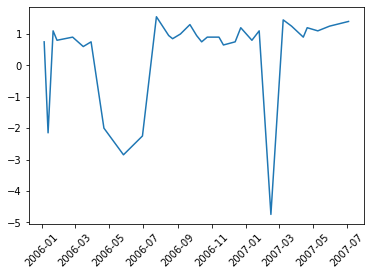

In [20]:
plt.plot(dates, profits)
plt.xticks(rotation = 45)
plt.show()

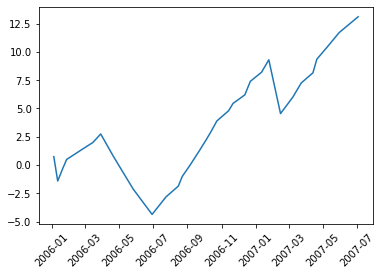

In [21]:
plt.plot(dates, cumm)
plt.xticks(rotation = 45)
plt.show()

In [22]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 13.1


In [23]:
average = total_p_l / len(profits)
print(f'Average profit: {average}')

Average profit: 0.409375


In [13]:
[t['max_loss'] for t in trades.values()]

KeyError: 'max_loss'